#Agrupamiento de imágenes con mapas autoorganizados


Mauricio Flores Pérez | A01639917
<br>
Tom Bruno Arc | A01562405
<br>
Alejandro Hermosillo García | A01634552


In [2]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for minisom: filename=MiniSom-2.3.0-py3-none-any.whl size=9016 sha256=43be4de5742cdfe7fd503a01e8457b38317d89f5b6507af23a0eca93fcafc368
  Stored in directory: /root/.cache/pip/wheels/d4/ca/4a/488772b0399fec45ff53132ed14c948dec4b30deee3a532f80
Successfully built minisom


In [3]:
from minisom import MiniSom

import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

from keras.datasets import fashion_mnist

In [4]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## MiniSOM

### Fashion-MNIST

**Labels**
<br>
* 0 - T-shirt/Top
* 1 - Trouser
* 2 - Pullover
* 3 - Dress
* 4 - Coat
* 5 - Sandal
* 6 - Shirt
* 7 - Sneaker 
* 8 - Bag
* 9 - Ankle boot

In [6]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_X = train_images/255.0

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
nsamples, nx, ny = train_X.shape
d2_train_X = train_X.reshape((nsamples,nx*ny))

In [8]:
d2_train_X.shape

(60000, 784)

In [9]:
som1 = MiniSom(50, 50, 784, sigma=4, 
              learning_rate=0.5, neighborhood_function='triangle')
som1.pca_weights_init(d2_train_X)
som1.train(d2_train_X, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 3.969841577710341


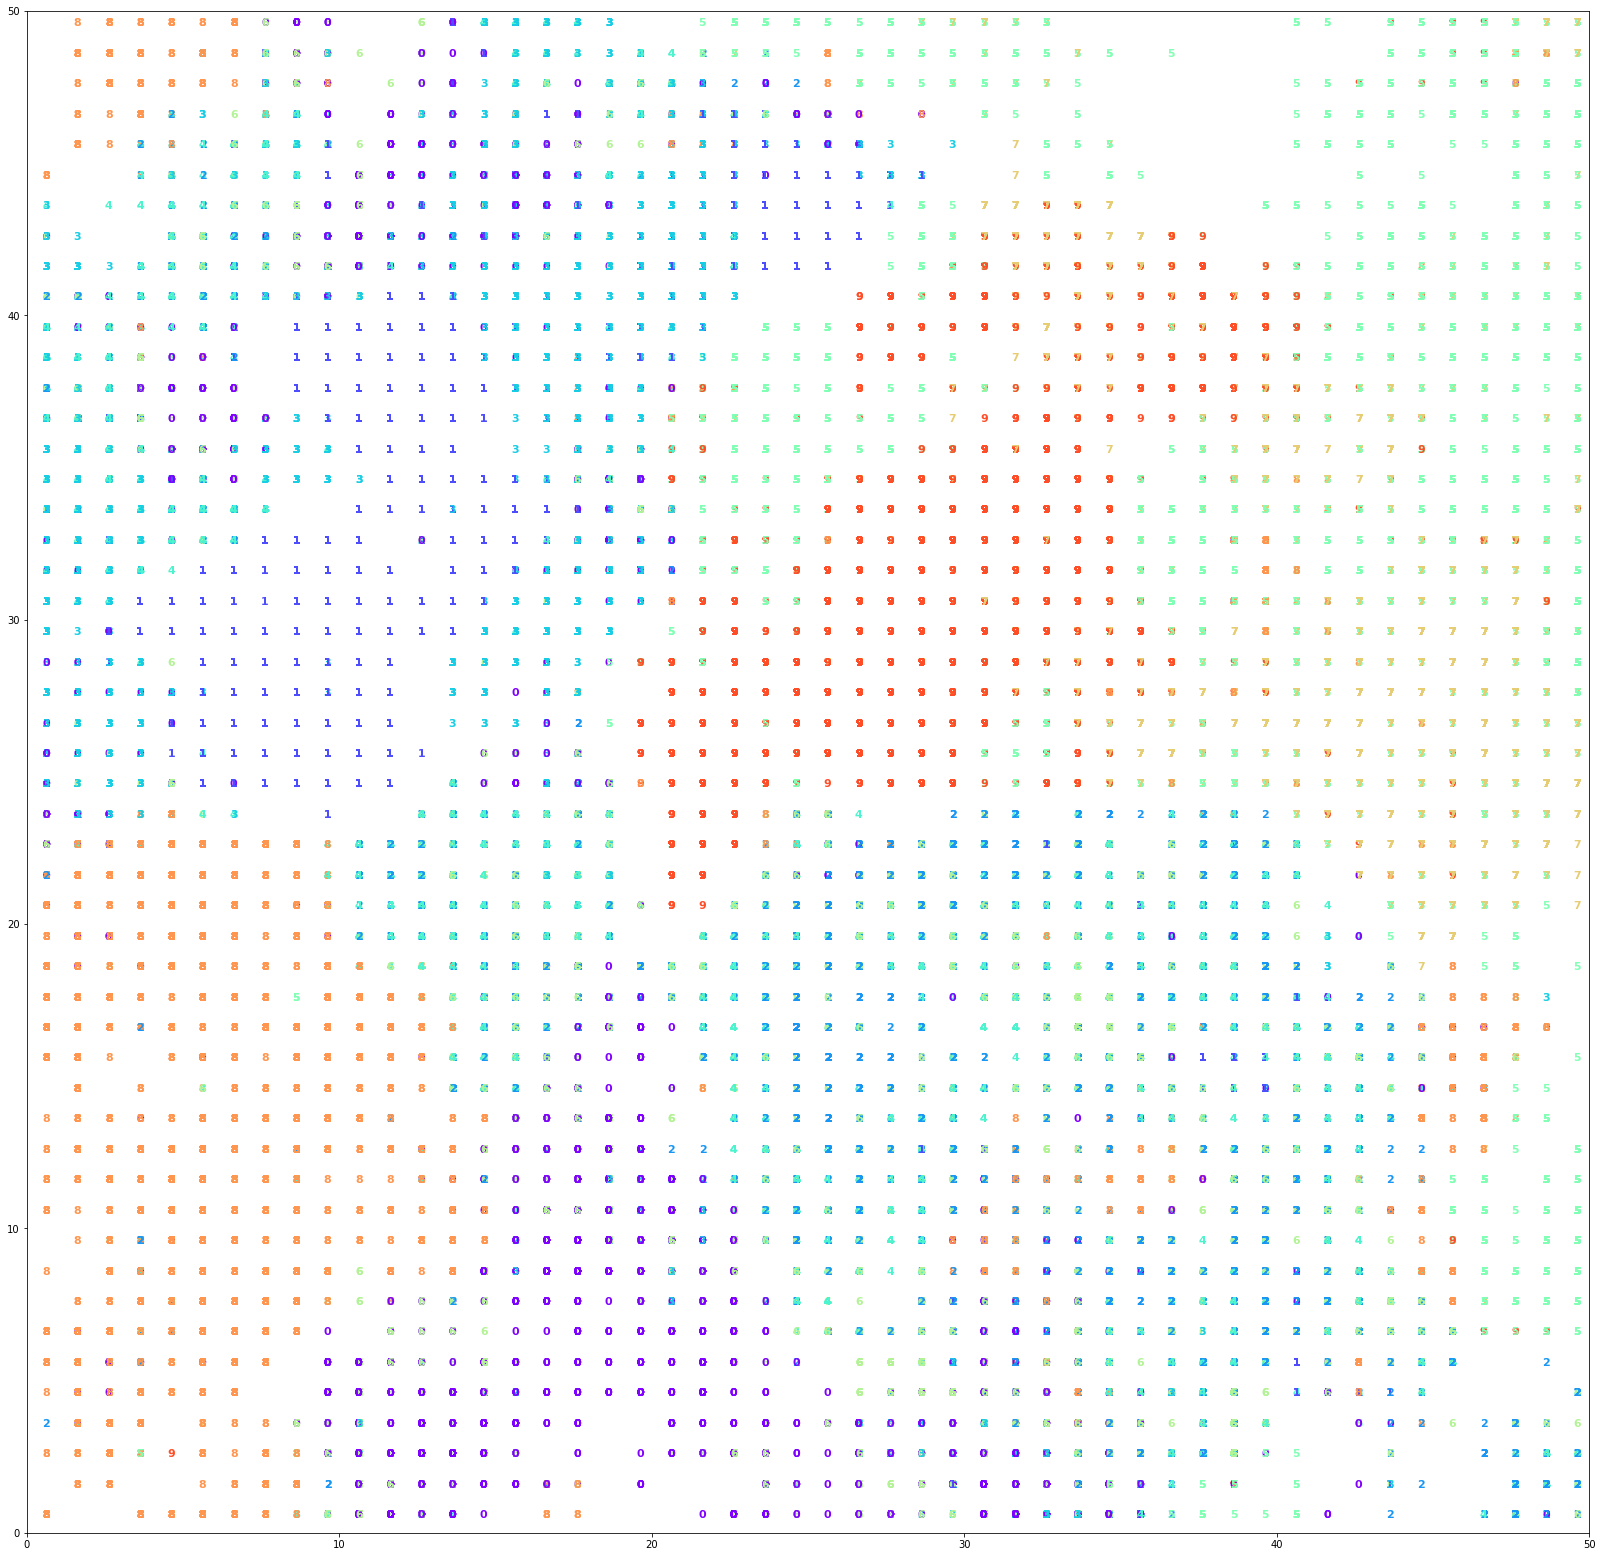

In [10]:
plt.figure(figsize=(28,28))
wmap= {}
im = 0
for x, t in zip(d2_train_X, train_labels):
  w = som1.winner(x)
  wmap[w] = im
  plt. text (w[0]+0.5, w[1]+0.5, str(t),
             color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold', 'size':11})
  im = im + 1
plt.axis([0, som1.get_weights().shape[0], 0,  som1.get_weights().shape[1]])
plt.show()

### Emojis

**Labels**
<br>
* 0 - Cara feliz
* 1 - Cara triste 
* 2 - Cara enojada 
* 3 - Cara sorprendida
* 4 - Doodoo

In [11]:
emojis = np.loadtxt('/content/drive/Shareddrives/Redes neuronales/data/emojis.txt')
X = emojis[:, 1:]
y = emojis[:, 0]

In [14]:
som = MiniSom(50, 50, 1024, sigma=4, 
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(X)
som.train(X, 5000, random_order=True, verbose=True)

 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 7.031445467792401


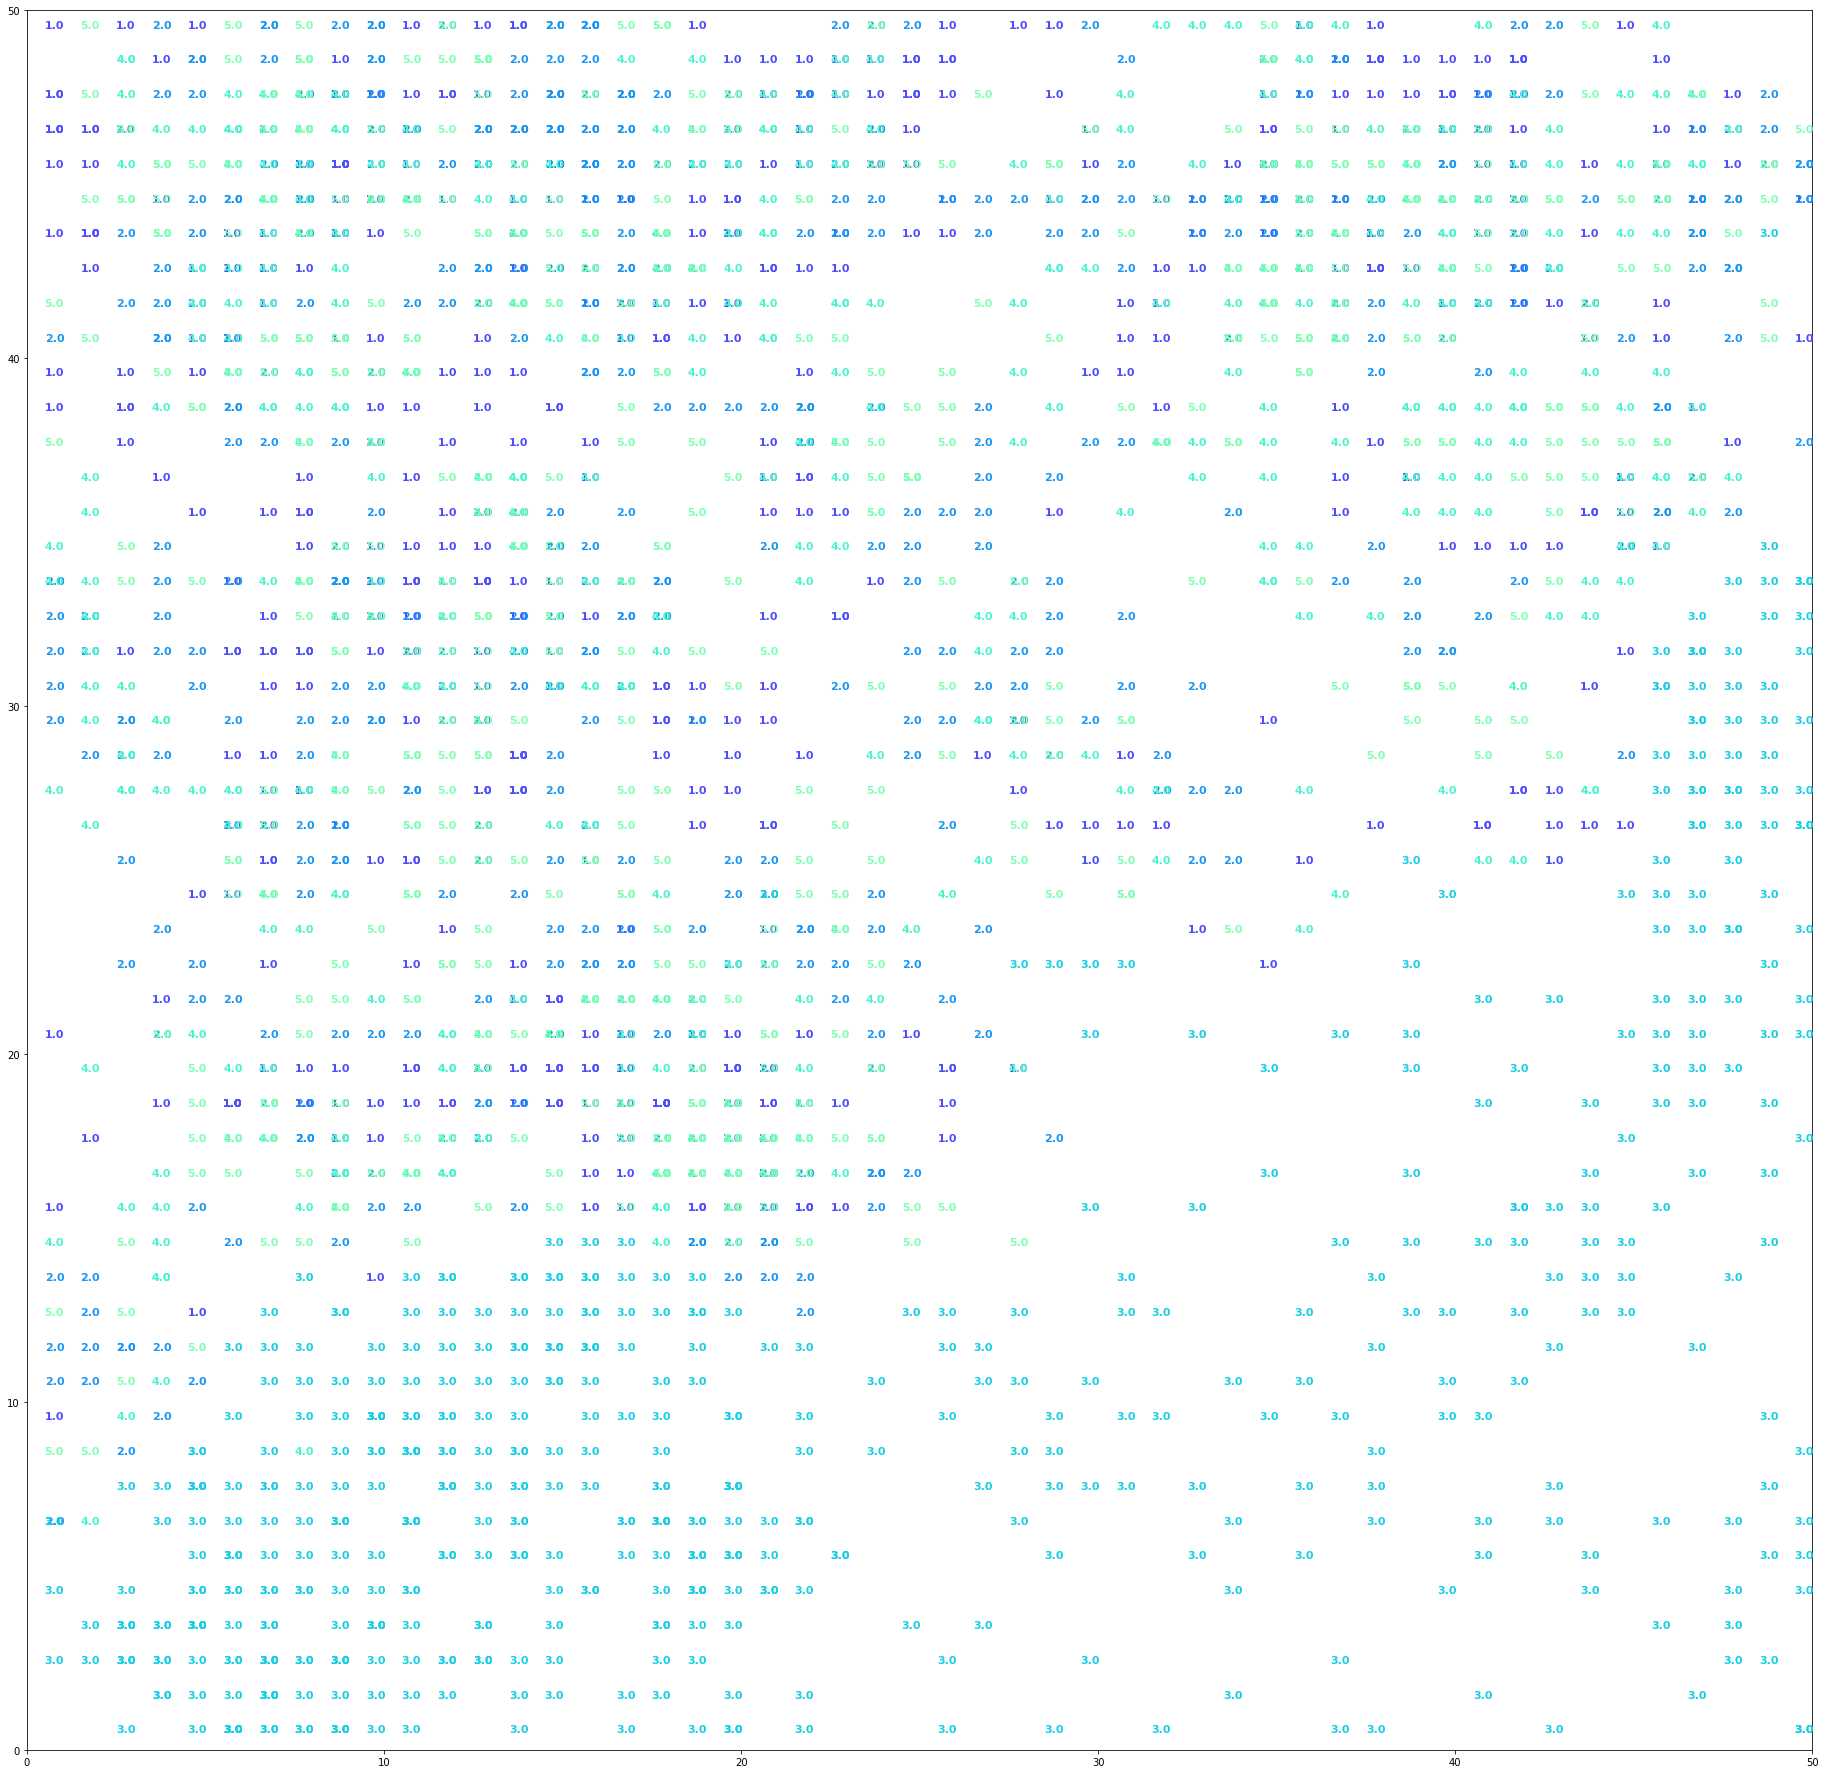

In [15]:
plt.figure(figsize=(32,32))
wmap= {}
im = 0
for x, t in zip(X, y):
  w = som.winner(x)
  wmap[w] = im
  plt.text (w[0]+0.5, w[1]+0.5, str(t),
            color=plt.cm.rainbow(t/10.), fontdict={'weight': 'bold', 'size':11})
  im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.show()